In [1]:
# load a csv file into pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# read in the xlsx file called quiz_responses.xlsx top column is the index
df = pd.read_excel('quiz_responses.xlsx', index_col=0)

In [2]:
# drop colums with nan values
df = df.dropna(axis=1, how='all')
# Total Points column that > 0 is kept
df = df[df['Total points'] > 0]
# drop Permission column
df = df.drop('Permission', axis=1)
df = df.drop('Email', axis=1)

In [3]:
df.head()

,Start time,Completion time,Total points,Q1,Points - Q1,Q2,Points - Q2,Q3,Points - Q3,Q4,...,Q6,Points - Q6,Q7,Points - Q7,Q8,Points - Q8,Q9,Points - Q9,Q10,Points - Q10
ID,,,,,,,,,,,,,,,,,,,,,
11,2023-03-21 17:41:47,2023-03-21 17:43:04,9,Blue Point is thicker,1,Red Point is thicker,1,Red Point is thicker,1,Red Point is thicker,...,Blue Point is thicker,1,Blue Point is thicker,1,Red Point is thicker,1,Blue Point is thicker,1,Red Point is thicker,0
12,2023-03-22 15:24:24,2023-03-22 15:25:11,6,Red Point is thicker,0,Red Point is thicker,1,Blue Point is thicker,0,Red Point is thicker,...,Blue Point is thicker,1,Blue Point is thicker,1,Red Point is thicker,1,Red Point is thicker,0,Red Point is thicker,0
13,2023-03-22 15:24:11,2023-03-22 15:26:04,8,Blue Point is thicker,1,Red Point is thicker,1,Red Point is thicker,1,Red Point is thicker,...,Blue Point is thicker,1,Blue Point is thicker,1,Cannot tell,0,Cannot tell,0,Blue Point is thicker,1
14,2023-03-22 15:24:26,2023-03-22 15:26:16,8,Blue Point is thicker,1,Red Point is thicker,1,Red Point is thicker,1,Red Point is thicker,...,Blue Point is thicker,1,Blue Point is thicker,1,Cannot tell,0,Blue Point is thicker,1,Cannot tell,0
15,2023-03-22 15:23:58,2023-03-22 15:27:23,6,Red Point is thicker,0,Red Point is thicker,1,Red Point is thicker,1,Red Point is thicker,...,Blue Point is thicker,1,Red Point is thicker,0,Cannot tell,0,Blue Point is thicker,1,Blue Point is thicker,1


In [4]:
print("Number of participants: ", len(df.index))
# sum each of the columns 


Number of participants:  36


<AxesSubplot: xlabel='ID'>

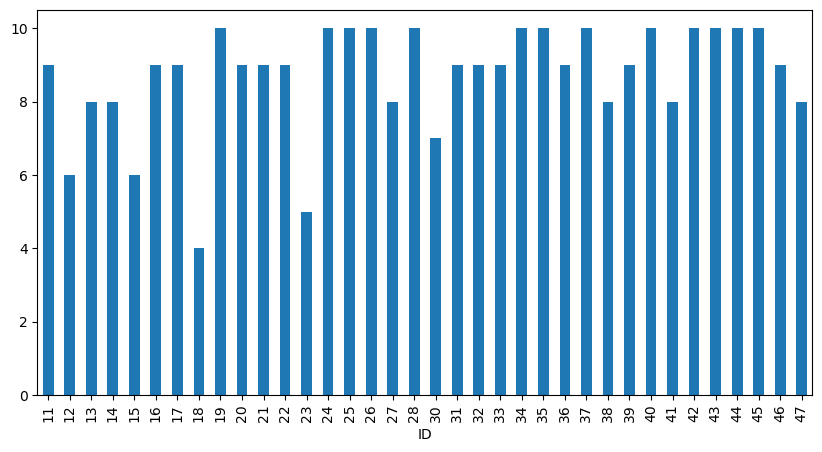

In [5]:
# performance of each row (participant)
df['Total points'].plot(kind='bar', figsize=(10,5))

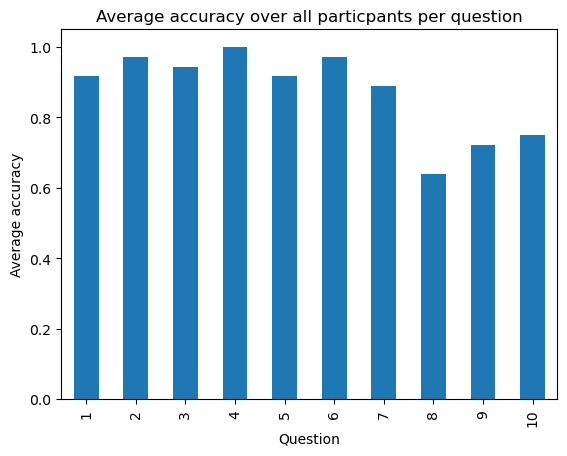

In [6]:
# plot pts_for_each_q without total points and devide by the total participants
pts_for_each_q = df.sum(numeric_only=True)
# remove "Points - " from each row name
pts_for_each_q.index = pts_for_each_q.index.str.replace('Points - Q', '')
pts_for_each_q = pts_for_each_q.drop('Total points')
pts_for_each_q = (pts_for_each_q/len(df.index) )
fig = pts_for_each_q.plot(kind='bar', title='Average accuracy over all particpants per question')
# x axis label
plt.xlabel('Question')
# y axis label
plt.ylabel('Average accuracy')
# save the plot as pdf
plt.savefig('figs\\humans\\Average_accuracy_over_all_particpants_per_question.pdf')

In [8]:
# average value overall
print("Average value overall: ", pts_for_each_q.mean())

Average value overall:  0.8722222222222221
